# Simulated Annealing for TSP

Modified from https://github.com/jedrazb/python-tsp-simulated-annealing

### Prioritised TSP with 2-OPT simulated annealing

The major modification of the algorithm is in the weight calculation function for each route.

Rather than just use the *distance* between nodes, the *distance* itself is reweighted by priority as follows:

```
def weight(self, sol):
        '''
        Calcuate weight
        '''
        solution_nodes = [i for i, j in zip(sol, sol[1:] + [sol[0]])]
        solution = [self.dist_matrix[i, j] for i, j in zip(sol, sol[1:] + [sol[0]])]
        for i in range(len(solution_nodes)):
            if solution_nodes[i] in self.priority_nodes:
                modification = ((1.0 / (len(solution_nodes)/2)) * i)
                solution[i] = solution[i] * modification
        return sum(solution)
```

If a node is a *priority* to visit, it's weight in the route is recalculated as a function of *weight* and *position* in the route:

f(weight) = weight * ((1.0 / (len(solution_nodes)/2)) * i)

f(weight) is therefore a values somewhere between 0% and 200% of the original weight, depending in *i*, where *i* is the position in the route.

Applying f(weight) to priority nodes penalises routes which place priority nodes towards the end of the route, and enhances routes which place priority nodes earlier in the route. Importantly, this rule is not absolute: meaning that very short route moves can still persist and the overall can still be optimised by distance.

The example below shows 2-OPT SA with prioritisation for nodes 2, 8 and 14 in a 20 node route. 

![Prioritised SA](demos/demos/predictive_scheduling/output.gif)

In [15]:
from nodes_generator import NodeGenerator
from simulated_annealing import SimulatedAnnealing
%matplotlib inline
import matplotlib
from matplotlib import animation, rc
from IPython.display import HTML, Image
rc('animation', html='html5')
matplotlib.rcParams['animation.embed_limit'] = 2**128

Create a map of lift IDs to node IDs

In [16]:
lift_map = {
    0: "510",
    1: "221",
    2: "455",
    3: "323",
    4: "388",
    5: "396",
    6: "456",
    7: "203",
    8: "585",
    9: "363",
    10: "475",
    11: "283",
    12: "450",
    13: "453",
    14: "229",
    15: "320",
    16: "396"
}

Create a list of priority jobs, indicated by their lift ID

In [17]:
priority_jobs = ["221", "585", "229"]

Instantiate the route and hyper parameters for optimisation

In [18]:
'''set the simulated annealing algorithm params'''
temp = 1000
stopping_temp = 0.00000001
alpha = 0.99995
stopping_iter = 1000000

'''set the dimensions of the grid'''
size_width = 2000
size_height = 2000

'''set the number of nodes'''
population_size = 17

'''set priority nodes'''
priority_nodes = [2, 8, 14]

'''generate random list of nodes'''
nodes = NodeGenerator(size_width, size_height, population_size).generate()

Anneal the route without prioritisation

In [23]:
'''run prioritised simulated annealing algorithm with 2-opt'''
sa = SimulatedAnnealing(nodes, temp, alpha, stopping_temp, stopping_iter)
sa.anneal()

Intial weight:  7076.454537796667
Minimum weight:  6755.058145995102
Improvement:  4.54 %


Draw the optimised route

Route: ['320', '585', '455', '388', '203', '396', '396', '510', '229', '475', '456', '323', '283', '221', '453', '450', '363']


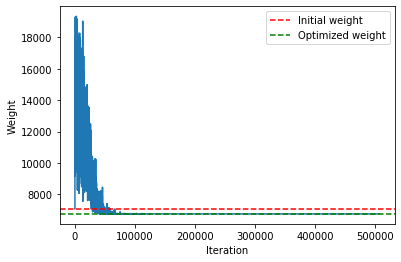

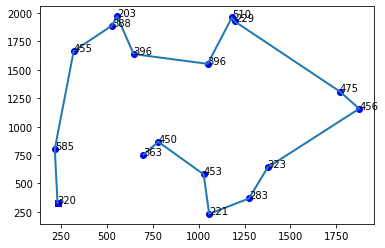

In [24]:
print("Route: {}".format([lift_map[x] for x in sa.best_solution]))
sa.plotLearning()
sa.plotBest(lift_map)

Optimise the route incorporating prioritisation

In [25]:
'''run prioritised simulated annealing algorithm with 2-opt'''
sa_priority = SimulatedAnnealing(nodes, temp, alpha, stopping_temp, stopping_iter, priority_nodes)
sa_priority.anneal()

Intial weight:  7410.444904202444
Minimum weight:  5669.999486670964
Improvement:  23.49 %


Draw the optimised route

Route: ['585', '510', '229', '388', '203', '455', '396', '396', '475', '456', '323', '221', '283', '453', '450', '363', '320']


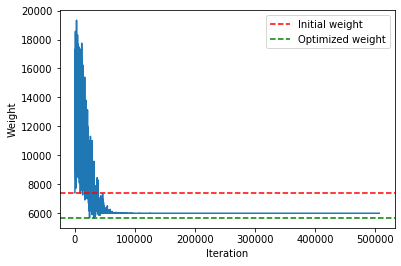

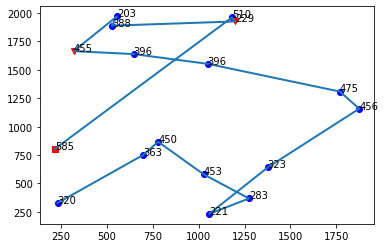

In [26]:
print("Route: {}".format([lift_map[x] for x in sa_priority.best_solution]))
sa_priority.plotLearning()
sa_priority.plotBest(lift_map)